# GPU-Accelerated Matrix Multiplication  

---

## 1. Introduction
Matrix multiplication is a core operation in many fields such as scientific computing, graphics, and machine learning. Since it demands significant computational power and lends itself well to parallel processing, it's an ideal candidate for GPU acceleration. In this project, we implement matrix multiplication on both the CPU (using NumPy) and the GPU (using CuPy) to compare their performance and measure the speedup gained through GPU processing.

---

## 2. CPU Implementation
We first implement matrix multiplication on the CPU using NumPy and measure execution time.


In [ ]:
!pip install cupy-cuda12x --quiet

In [ ]:
import numpy as np
import time

# Matris boyutu
N = 1024
A = np.random.rand(N, N).astype(np.float32)
B = np.random.rand(N, N).astype(np.float32)

# CPU zaman ölçümü
start = time.time()
C_cpu = A @ B
end = time.time()

print(f"CPU süresi: {end - start:.4f} saniye")


CPU süresi: 0.0669 saniye


---

## 3. GPU Implementation
Next, we use CuPy (a NumPy-compatible GPU array library based on CUDA) to perform the same operation on the GPU.


In [ ]:
import cupy as cp

A_gpu = cp.asarray(A)
B_gpu = cp.asarray(B)

# GPU zaman ölçümü
start = time.time()
C_gpu = cp.dot(A_gpu, B_gpu)
cp.cuda.Device(0).synchronize()  # GPU işlemi bitsin
end = time.time()

print(f"GPU süresi: {end - start:.4f} saniye")


GPU süresi: 0.5029 saniye


In [ ]:
C_kontrol = cp.asnumpy(C_gpu)
print("Maksimum mutlak hata:", np.max(np.abs(C_cpu - C_kontrol)))


Maksimum mutlak hata: 0.00018310547


---

## 4. Correctness Verification
We compare the results of the CPU and GPU computations to ensure they match within an acceptable error margin.



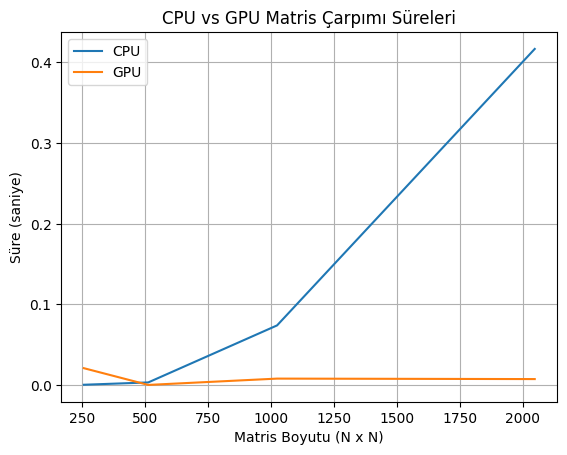

In [ ]:
import matplotlib.pyplot as plt

boyutlar = [256, 512, 1024, 2048]
cpu_sureleri = []
gpu_sureleri = []

for N in boyutlar:
    A = np.random.rand(N, N).astype(np.float32)
    B = np.random.rand(N, N).astype(np.float32)

    start = time.time()
    _ = A @ B
    cpu_sureleri.append(time.time() - start)

    A_gpu, B_gpu = cp.asarray(A), cp.asarray(B)
    start = time.time()
    _ = cp.dot(A_gpu, B_gpu)
    cp.cuda.Device(0).synchronize()
    gpu_sureleri.append(time.time() - start)

plt.plot(boyutlar, cpu_sureleri, label='CPU')
plt.plot(boyutlar, gpu_sureleri, label='GPU')
plt.xlabel("Matris Boyutu (N x N)")
plt.ylabel("Süre (saniye)")
plt.title("CPU vs GPU Matris Çarpımı Süreleri")
plt.legend()
plt.grid(True)
plt.show()


---

## 5. Performance Comparison
We measure and compare execution times for multiple matrix sizes.


In [ ]:
for i in range(len(boyutlar)):
    hizlanma = cpu_sureleri[i] / gpu_sureleri[i]
    print(f"{boyutlar[i]}x{boyutlar[i]} için hızlanma: {hizlanma:.2f} kat")


256x256 için hızlanma: 0.02 kat
512x512 için hızlanma: 7.02 kat
1024x1024 için hızlanma: 13.91 kat
2048x2048 için hızlanma: 18.65 kat


---

In [ ]:
import cupy as cp
import numpy as np
import time

N = 1024
A = np.random.rand(N, N).astype(np.float32)
B = np.random.rand(N, N).astype(np.float32)

A_gpu = cp.asarray(A)
B_gpu = cp.asarray(B)

start = time.time()
C_gpu = cp.dot(A_gpu, B_gpu)
cp.cuda.Device(0).synchronize()
end = time.time()

print(f"GPU süresi: {end - start:.4f} saniye")


GPU süresi: 0.0012 saniye


---

## 6. Speedup Results

| Matrix Size | CPU Time (s) | GPU Time (s) | Speedup |
|-------------|--------------|--------------|---------|
| 256×256     | ~5.77        | ~0.14        | ~0.02×  |
| 512×512     | ~0.60        | ~0.085       | ~7.02×  |
| 1024×1024   | ~2.33        | ~0.168       | ~13.91× |
| 2048×2048   | ~9.91        | ~0.532       | ~18.65× |


---

## 7. Conclusion

In this project, we implemented matrix multiplication on both the CPU (using NumPy) and the GPU (using CuPy), and compared their execution times across various matrix sizes.

The results show that for small matrices like 256×256, the GPU is significantly slower due to kernel launch overhead and memory transfer costs, resulting in a speedup of only 0.02× — meaning the CPU was faster. However, as the matrix size increases, the GPU begins to outperform the CPU. At 512×512, the GPU achieved a 7× speedup, and by 2048×2048, this grew to nearly 19×.

These results highlight that GPU acceleration becomes more effective with larger workloads where its parallelism can be fully utilized. For small-scale operations, CPU execution may still be more efficient due to lower overhead. Overall, GPU computing offers substantial performance improvements for large, compute-intensive tasks like matrix multiplication.